In [1]:
# required imports

import xlrd
import random
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [2]:
# reading the district wise shapefile of India in a GeoDataFrame and preview it

fp = "gadm36_IND_shp/gadm36_IND_2.shp"
map_df = gpd.read_file(fp)
map_df.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.1_1,Nicobar Islands,None,None,District,District,None,IN.AN.NI,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.2_1,North and Middle Andaman,None,None,District,District,None,IN.AN.NM,"MULTIPOLYGON (((92.93898 12.22386, 92.93916 12..."
2,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.3_1,South Andaman,None,None,District,District,None,IN.AN.SA,"MULTIPOLYGON (((92.47972 10.52056, 92.47945 10..."
3,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.1_1,Anantapur,"Anantpur, Ananthapur",None,District,District,None,IN.AD.AN,"POLYGON ((77.71420 13.76079, 77.71314 13.75074..."
4,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.2_1,Chittoor,Chitoor|Chittor,None,District,District,None,IN.AD.CH,"POLYGON ((78.46293 12.63537, 78.46190 12.63228..."


In [71]:

fp = "india-district-wise-shape-files/output.shp"
map_df2 = gpd.read_file(fp)
map_df2.head()

,objectid,statecode,statename,state_ut,distcode,distname,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths,geometry
0,1,05,Uttarakhand,STATE,066,Nainital,4251.0,954605.0,191383.0,493666.0,460939.0,5.322546e+09,506182.695952,"POLYGON ((79.52659 29.05543, 79.52550 29.05545..."
1,2,05,Uttarakhand,STATE,060,Dehradun,3088.0,1696694.0,347001.0,892199.0,804495.0,4.177236e+09,578188.681639,"POLYGON ((77.87557 30.26052, 77.87467 30.26087..."
2,3,05,Uttarakhand,STATE,064,Almora,3144.0,622506.0,140577.0,291081.0,331425.0,4.140751e+09,463454.225766,"POLYGON ((79.28494 29.92735, 79.28495 29.92723..."
3,4,05,Uttarakhand,STATE,065,Champawat,1766.0,259648.0,53953.0,131125.0,128523.0,2.294297e+09,314508.010612,"POLYGON ((80.12479 29.01308, 80.12481 29.01306..."
4,5,05,Uttarakhand,STATE,056,Uttarkashi,8016.0,330086.0,67602.0,168597.0,161489.0,1.085166e+10,786425.588972,"POLYGON ((78.92267 31.25333, 78.93106 31.26840..."


In [ ]:
map

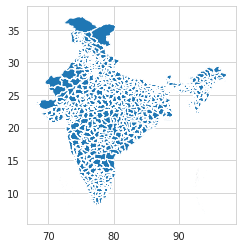

In [73]:
map_df2 = map_df2[['distname', 'geometry']]
map_df2.plot()

In [82]:
map_df.shape,map_df2.shape

((666, 2), (693, 2))

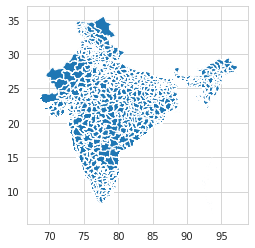

In [3]:
# keep required columns and plot default map

map_df = map_df[['NAME_2', 'geometry']]
map_df.plot()

districtwise-color-code.tsv   district_wise.xls  Updated_covid01_05_2020.xlsx
districtwise-color-code.xlsx  gadm36_IND_shp	 visualise.ipynb


In [7]:
# read the district wise excel file and preview it

district_wise = pd.read_excel('districtwise-color-code.xlsx')
district_wise.head()

,No,District,State,Zone,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,1.0,South Andamans,Andaman And Nicobar Islands,Red Zone,NaN
2,NaN,NaN,NaN,NaN,NaN
3,2.0,Nicobars,Andaman And Nicobar Islands,Green Zone,NaN
4,NaN,NaN,NaN,NaN,NaN


In [9]:
del district_wise["Unnamed: 4"]

In [12]:
district_wise = district_wise.dropna()

In [83]:
district_wise.shape

(733, 4)

In [21]:
import fuzzy_pandas as fpd

In [22]:
results = fpd.fuzzy_merge(map_df, district_wise,
            left_on='NAME_2',
            right_on=' District ',
            method='levenshtein',
            threshold=0.6)

In [74]:
results = fpd.fuzzy_merge(map_df2, district_wise,
            left_on='distname',
            right_on=' District ',
            method='levenshtein',
            threshold=0.6)

In [75]:
results.shape

(785, 6)

In [77]:
results.head()

,distname,geometry,No,District,State,Zone
0,Nainital,"POLYGON ((79.52658999977145 29.05542999993833,...",700.0,Nainital,Uttarakhand,Orange Zone
1,Dehradun,"POLYGON ((77.87556999967723 30.2605200002262, ...",699.0,Dehradun,Uttarakhand,Orange Zone
2,Almora,"POLYGON ((79.28494000022236 29.92734999970642,...",702.0,Almora,Uttarakhand,Green Zone
3,Champawat,"POLYGON ((80.12478999983851 29.01308000009541,...",706.0,Champawat,Uttarakhand,Green Zone
4,Uttarkashi,"POLYGON ((78.92266999959065 31.25333000018747,...",710.0,Uttar Kashi,Uttarakhand,Green Zone


In [78]:
color  = results[' Zone']

In [79]:
results["color"] = color.apply(lambda x: str(x).split()[0])

In [81]:
results.isna().sum()

distname      0
geometry      0
No            0
 District     0
 State        0
 Zone         0
color         0
dtype: int64

<Figure size 2160x1080 with 0 Axes>

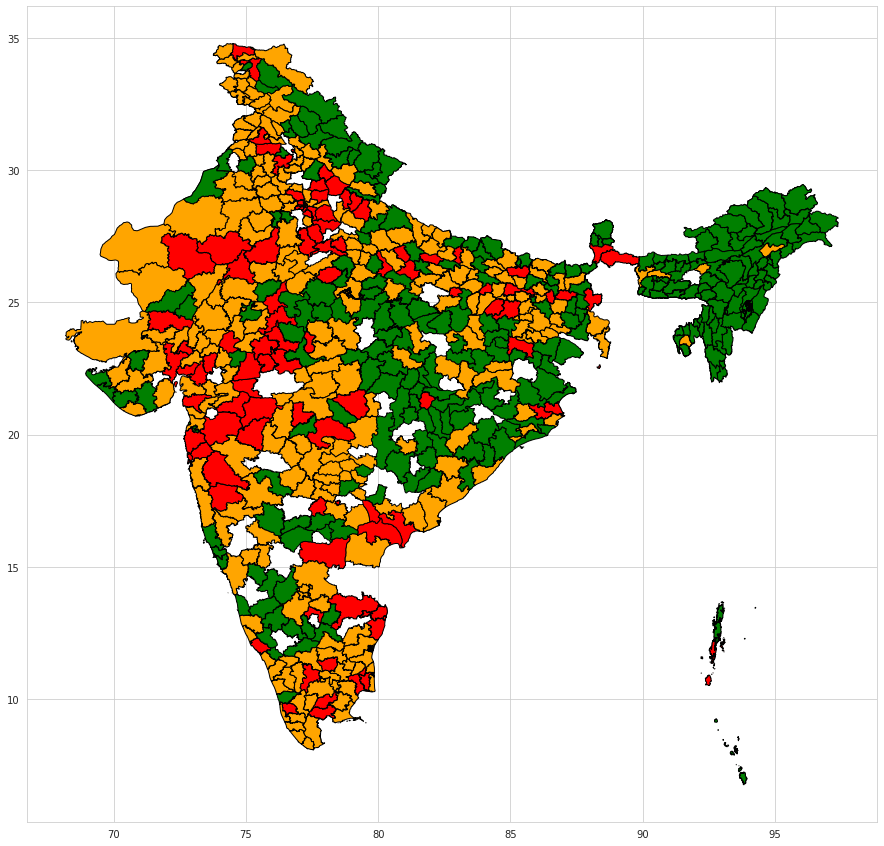

In [80]:
# plot(, edgecolor='black')
plt.figure(figsize=(30,15))
pltmap_df = results[['distname', 'geometry','color']]
pltmap_df = gpd.GeoDataFrame(pltmap_df)
pltmap_df.plot(figsize=(20,15), color=pltmap_df["color"],edgecolor='black')

In [31]:
pltmap_df

NAME_2      0
geometry    0
dtype: int64